Input file: `insurance_p1.csv` dataset from project 1. Packed with information on health insurance customers.

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the beneficiary.                                  |
| `gender`    | object    | male or female.             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of childrens.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |

In [97]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the insurance dataset as outout from project 1 (Running project 1 will genarate insurance_p1.csv)
df = pd.read_csv('insurance_p1.csv')

In [98]:
# Train with four different models
    # LinearRegression
    # DecisionTreeRegressor
    # RandomForestRegressor
    # XGBRegressor
    
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def regression_models(X_train, X_test, y_train, y_test):    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_preds = lr_model.predict(X_test)
    
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    dt_preds = dt_model.predict(X_test)
    
    rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    
    xgb_model = XGBRegressor(random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_preds = xgb_model.predict(X_test)
    
    return lr_model, lr_preds, dt_model, dt_preds, rf_model, rf_preds, xgb_model, xgb_preds

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, y_test, preds):
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    # Calculate mean of the target values
    mean_target = np.mean(y_test)
    
    # Calculate errors as a percentage of the mean target
    mae_percent = (mae / mean_target) * 100
    rmse_percent = (rmse / mean_target) * 100

    print(f"Model: {name}")
    print(f"  MAE: {mae:.2f} ({mae_percent:.2f}%)")
    print(f"  RMSE: {rmse:.2f} ({rmse_percent:.2f}%)")
    print(f"  R²: {r2:.2f}\n")
    
    return {
        "Model": name,
        "MAE": mae,
        "MAE (%)": mae_percent,
        "RMSE": rmse,
        "RMSE (%)": rmse_percent,
        "R²": r2
    }

In [100]:
# Prepare features values and target values
X = df.drop(columns=['charges'])
y = df['charges']

# Split into 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train with 4 different models
(lr_model, lr_preds, dt_model, dt_preds, rf_model, rf_preds, xgb_model, xgb_preds) = regression_models(X_train, X_test, y_train, y_test)

In [101]:
# Evaluate models

results = []
results.append(evaluate_model("Linear Regression", y_test, lr_preds))
results.append(evaluate_model("Decision Tree", y_test, dt_preds))
results.append(evaluate_model("Random Forest", y_test, rf_preds))
results.append(evaluate_model("XGBoost", y_test, xgb_preds))

Model: Linear Regression
  MAE: 4378.72 (33.63%)
  RMSE: 6319.54 (48.54%)
  R²: 0.70

Model: Decision Tree
  MAE: 3002.05 (23.06%)
  RMSE: 6545.32 (50.27%)
  R²: 0.68

Model: Random Forest
  MAE: 2875.12 (22.08%)
  RMSE: 4887.20 (37.54%)
  R²: 0.82

Model: XGBoost
  MAE: 3076.33 (23.63%)
  RMSE: 5309.42 (40.78%)
  R²: 0.79



### As seen above. Model: Random Forest gave best result. We continue with it.

In [102]:
# Check the importance of each feature

from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
importance.sort_values(by='Importance', ascending=False, inplace=True)
print(importance)


            Feature  Importance
3            smoker    1.475275
1               bmi    0.316949
0               age    0.219582
2          children    0.018727
4  region_northeast    0.007886
5  region_northwest    0.003820
6  region_southwest   -0.002050
7           is_male   -0.004026


### As seen above. Features: region_northeast, region_northwest, region_southwest, is_male are not important and can be dropped. 

In [103]:
# Drop unimportant columns
X.drop(columns=["region_northeast", "region_northwest", "region_southwest", "is_male"], inplace=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain
(lr_model, lr_preds, dt_model, dt_preds, rf_model, rf_preds, xgb_model, xgb_preds) = regression_models(X_train, X_test, y_train, y_test)


In [104]:
results = []
results.append(evaluate_model("Linear Regression", y_test, lr_preds))
results.append(evaluate_model("Decision Tree", y_test, dt_preds))
results.append(evaluate_model("Random Forest", y_test, rf_preds))
results.append(evaluate_model("XGBoost", y_test, xgb_preds))

Model: Linear Regression
  MAE: 4380.95 (33.65%)
  RMSE: 6327.89 (48.60%)
  R²: 0.70

Model: Decision Tree
  MAE: 3202.22 (24.60%)
  RMSE: 6745.53 (51.81%)
  R²: 0.66

Model: Random Forest
  MAE: 2973.09 (22.84%)
  RMSE: 5039.36 (38.71%)
  R²: 0.81

Model: XGBoost
  MAE: 3084.44 (23.69%)
  RMSE: 5407.98 (41.54%)
  R²: 0.78



### Again, the model Random Forest gave best result. We continue with it.

In [105]:
# Find the best parameters to use for Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [106]:
# Create the model with best parameters

optimized_rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Retrain with the optimized model
optimized_rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=42)

In [107]:
# Predictions with the optimized model
optimized_rf_preds = optimized_rf_model.predict(X_test)

# Evaluate the optimized model
optimized_results = evaluate_model("Optimized Random Forest", y_test, optimized_rf_preds)


Model: Optimized Random Forest
  MAE: 2732.74 (20.99%)
  RMSE: 4648.81 (35.71%)
  R²: 0.84



In [108]:
# Add new features
X['smoker_bmi'] = X['smoker'] * X['bmi']
X['bmi_squared'] = X['bmi'] ** 2
X['log_bmi'] = np.log(X['bmi'])

# X.drop(columns=["smoker_bmi"], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

optimized_rf_model.fit(X_train, y_train)

optimized_rf_preds_new_features = optimized_rf_model.predict(X_test)

# Evaluate the optimized model
optimized_results = evaluate_model("Optimized Random Forest", y_test, optimized_rf_preds_new_features)

Model: Optimized Random Forest
  MAE: 2763.75 (21.23%)
  RMSE: 4646.81 (35.69%)
  R²: 0.84



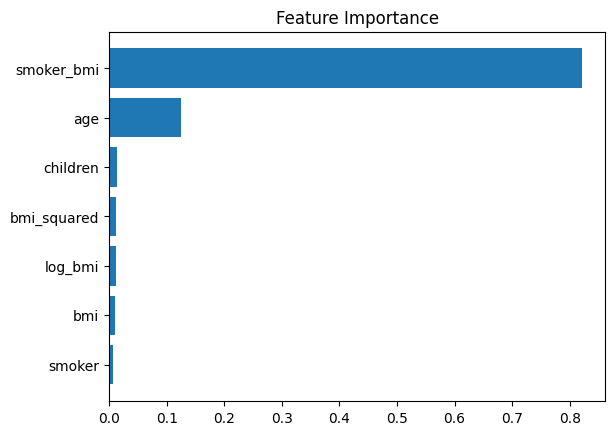

In [109]:
# Recheck the importance of the new features

feature_importances = optimized_rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
plt.title("Feature Importance")
plt.show()


In [110]:
# Try cross_val_score instead of 80/20% split

from sklearn.model_selection import cross_val_score

scores = cross_val_score(optimized_rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.3f} ± {scores.std():.3f}")


Cross-validated R²: 0.850 ± 0.023


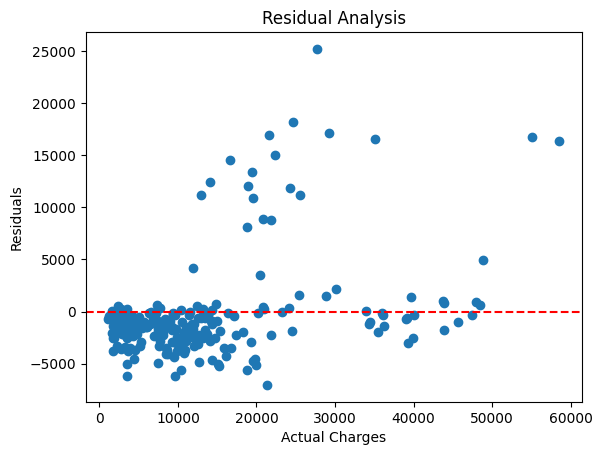

In [111]:
# Residual Analysis to check if there are edge cases that can be dropped. 

residuals = y_test - optimized_rf_preds_new_features
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Analysis")
plt.xlabel("Actual Charges")
plt.ylabel("Residuals")
plt.show()


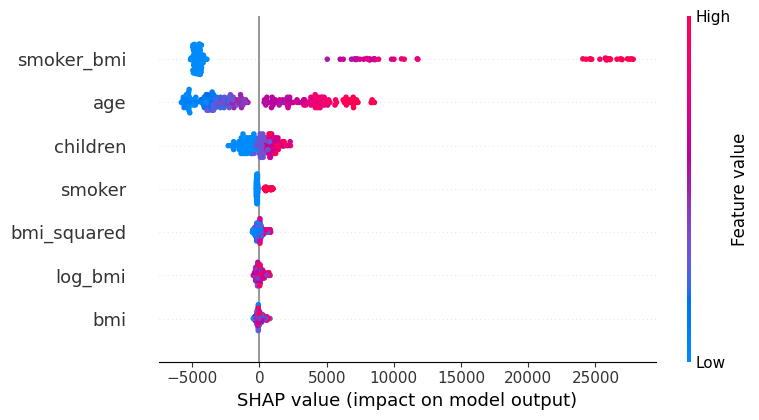

In [112]:
import shap

explainer = shap.Explainer(optimized_rf_model, X_test)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [113]:
# Import validation data
val_df = pd.read_csv('validation_dataset_insurance_p1.csv')

# Drop not important columnds from validation data
val_df.drop(columns=["region_northeast", "region_northwest", "region_southwest", "is_male"], inplace=True)

# Add the new features to the validation data
val_df['smoker_bmi'] = val_df['smoker'] * val_df['bmi']
val_df['bmi_squared'] = val_df['bmi'] ** 2
val_df['log_bmi'] = np.log(val_df['bmi'])

predictions = optimized_rf_model.predict(val_df)

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions

validation_data.head()

,age,bmi,children,smoker,smoker_bmi,bmi_squared,log_bmi,predicted_charges
0,18.0,24.090000,1.0,0,0.000000,580.328100,3.181797,3110.337564
1,39.0,26.410000,0.0,1,26.410000,697.488100,3.273743,20245.083142
2,27.0,29.150000,0.0,1,29.150000,849.722500,3.372455,20201.979828
3,71.0,65.502135,13.0,1,65.502135,4290.529728,4.182083,49718.991133
4,28.0,38.060000,0.0,0,0.000000,1448.563600,3.639164,6327.541481
